In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pathlib

In [2]:
## Returns a dictionary with BDT performances
## on a single data sample (training or test)
def BDTSamplePerformanceDictionary(trueNegatives, falsePositives, falseNegatives, truePositives, ROC, averagePrecision):
    sampleDictionaryKeys = [
        'truePositives',
        'falsePositives',
        'trueNegatives',
        'falseNegatives',
        'ROC',
        'averagePrecision'
    ]
    
    dictionary = {}
    
    dictionary['truePositives'] = truePositives
    dictionary['falsePositives'] = falsePositives
    dictionary['trueNegatives'] = trueNegatives
    dictionary['falseNegatives'] = falseNegatives
    dictionary['ROC'] = ROC
    dictionary['averagePrecision'] = averagePrecision
    
    return dictionary   

In [3]:
## Takes two arrays as input, the first with
## train results and second with test results, as
## well as the results of the KS test for signal and
## background. The order for the arrays must be as
## in the function BDTSamplePerformanceDictionary.
def BDTTrainTestPerformanceDictionary(trainPerformances, testPerformances,
    KSSignalP, KSBackgroundP):
    BDTDictionary = {}
    
    BDTDictionary['train'] = BDTSamplePerformanceDictionary(*trainPerformances)
    BDTDictionary['test'] = BDTSamplePerformanceDictionary(*testPerformances)
    BDTDictionary['KS_sig'] = KSSignalP
    BDTDictionary['KS_bkg'] = KSBackgroundP
    
    return BDTDictionary

In [4]:
## Inputs are four BDTs with same hyperparameters but
## different Lambda daughter momenta used (vertex fitter,
## DTF w/o and w/ mass constraint, or no momenta at all).
## If you're using the notebooks, the output of the final line
## is already formatted to be hiven to this function as argument.
def BDTMomentaSetPerformanceDictionary(VF, DTF, DTFL, NO):
    BDTSetDictionary = {}
    
    BDTSetDictionary['VF'] = BDTTrainTestPerformanceDictionary(*VF)
    BDTSetDictionary['DTF'] = BDTTrainTestPerformanceDictionary(*DTF)
    BDTSetDictionary['DTFL'] = BDTTrainTestPerformanceDictionary(*DTFL)
    BDTSetDictionary['NO'] = BDTTrainTestPerformanceDictionary(*NO)
    
    return BDTSetDictionary

# Model parameters
For now, this notebook only supports one BDT "model" (i.e. a specific set of hyperparameters) at a time and will display results in various plots. The `save_plots` variable will save them in `~/classifier-studies/plots/BDT/model_comparison/<model_name>/`, where `model_name` follows the naming convention established in the BDT notebooks.

In [5]:
save_plots = True

parameters = {
    'random_state': 2021,
    'learning_rate': 0.05,
    'max_depth': 4,
    'max_features': 3,
    'n_estimators': 1000,
    'subsample': 0.7
}

VF = [[0.6672443522481597, 0.01481413404056053, 0.015444336493098407, 0.30249717721818137, 0.9952610919860039, 0.9901474325950035], [0.6643166601024025, 0.017723513194170933, 0.018235525797558095, 0.29972430090586843, 0.9932624746065171, 0.9846315065978477], 0.27560954496427237, 0.15774920168659634]
DTF = [[0.6673931500494534, 0.014665336239266864, 0.01620145471732794, 0.3017400589939518, 0.995104839982224, 0.9897643342357503], [0.6654982276486806, 0.01654194564789287, 0.018629381646317448, 0.2993304450571091, 0.9935467303999358, 0.986716536450307], 0.4744776433098895, 0.8500193442434026]
DTFL = [[0.6664215879351242, 0.015636898353596093, 0.016687235774492555, 0.3012542779367872, 0.994740919536593, 0.9890220023646786], [0.66463174478141, 0.01740842851516345, 0.019692792437967704, 0.29826703426545886, 0.9932520096671433, 0.9856251476319108], 0.4171470373331978, 0.5897802703865895]
NO = [[0.6619970415495978, 0.02006144473912244, 0.022258400511164213, 0.29568311320011553, 0.9913884060753707, 0.9820953470869973], [0.659708546671918, 0.022331626624655376, 0.02556124458448208, 0.2923985821189445, 0.9890336019045932, 0.9766392944154898], 0.21896770963320544, 0.4051304138026408]

In [6]:
fileNamePattern = (
    'BDT'
    + '_' + str(parameters['learning_rate'])
    + '_' + str(parameters['max_depth'])
    + '_' + str(parameters['max_features'])
    + '_' + str(parameters['n_estimators'])
    + '_' + str(parameters['subsample'])
)

fileNamePattern

'BDT_0.05_4_3_1000_0.7'

In [7]:
## Create plots directory, if missing
plotsDirectory = '/home/adegenna/classifier-studies/plots/BDT/model_comparison/' + fileNamePattern
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

In [8]:
modelPerformances = BDTMomentaSetPerformanceDictionary(VF, DTF, DTFL, NO)

# Plots

In [9]:
momentaList = ['VF','DTF','DTFL','NO']

labelDictionary = {
    'VF': 'VF',
    'DTF': 'DTF',
    'DTFL': 'DTF+$\Lambda$',
    'NO': 'No momenta'
}

colorDictionary = {
    'VF': 'tab:red',
    'DTF': 'tab:green',
    'DTFL': 'tab:blue',
    'NO': 'tab:orange'
}

commonParameters = {
    'color': [colorDictionary[momentum] for momentum in momentaList]
}

In [10]:
## Index: where we plot the bars
## bar_width: smaller so we can fit both training and test data
indexes = np.arange(2)
bar_width=0.2

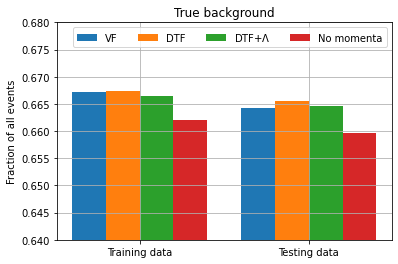

In [11]:
performanceToPlot = 'trueNegatives'
plotTitle = 'True background'
plotFileName = 'TN'
valueRange = (0.64,0.68)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][dataSample][performanceToPlot] for dataSample in ['train','test']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Training data', 'Testing data'])
plt.legend(ncol=4)
plt.ylabel('Fraction of all events')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()

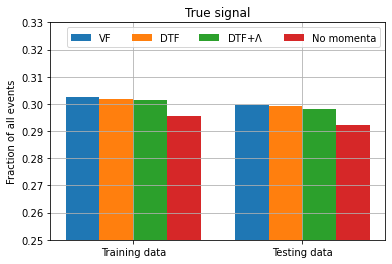

In [12]:
performanceToPlot = 'truePositives'
plotTitle = 'True signal'
plotFileName = 'TP'
valueRange = (0.25,0.33)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][dataSample][performanceToPlot] for dataSample in ['train','test']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Training data', 'Testing data'])
plt.legend(ncol=4)
plt.ylabel('Fraction of all events')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()

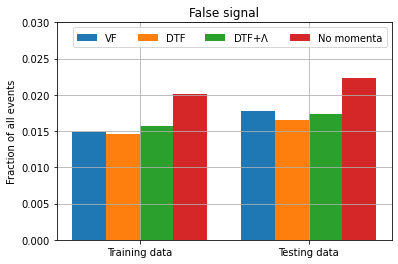

In [13]:
performanceToPlot = 'falsePositives'
plotTitle = 'False signal'
plotFileName = 'FP'
valueRange = (0.,0.03)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][dataSample][performanceToPlot] for dataSample in ['train','test']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Training data', 'Testing data'])
plt.legend(ncol=4)
plt.ylabel('Fraction of all events')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()

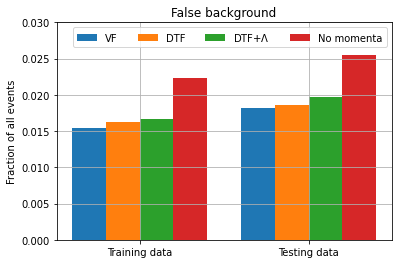

In [14]:
performanceToPlot = 'falseNegatives'
plotTitle = 'False background'
plotFileName = 'FN'
valueRange = (0.,0.03)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][dataSample][performanceToPlot] for dataSample in ['train','test']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Training data', 'Testing data'])
plt.legend(ncol=4)
plt.ylabel('Fraction of all events')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()

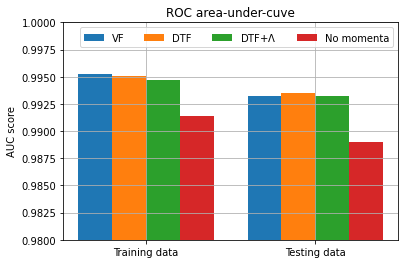

In [15]:
performanceToPlot = 'ROC'
plotTitle = 'ROC area-under-cuve'
plotFileName = 'ROC'
valueRange = (0.98,1.)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][dataSample][performanceToPlot] for dataSample in ['train','test']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Training data', 'Testing data'])
plt.legend(ncol=4)
plt.ylabel('AUC score')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()

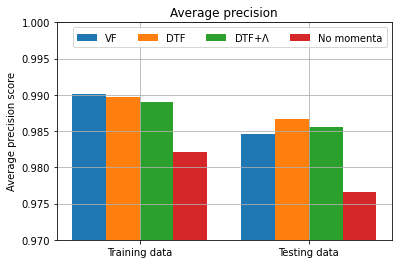

In [16]:
performanceToPlot = 'averagePrecision'
plotTitle = 'Average precision'
plotFileName = 'avg_prec'
valueRange = (0.97,1.)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][dataSample][performanceToPlot] for dataSample in ['train','test']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Training data', 'Testing data'])
plt.legend(ncol=4)
plt.ylabel('Average precision score')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()

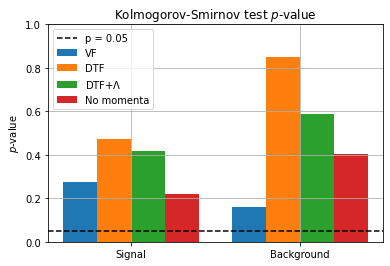

In [17]:
plotTitle = 'Kolmogorov-Smirnov test $p$-value'
plotFileName = 'KS'
valueRange = (0.,1.)

for (momentum, increment) in zip(['VF','DTF','DTFL','NO'],[0,1,2,3]):
    plt.bar(
        indexes+increment*bar_width,
        [modelPerformances[momentum][performanceToPlot] for performanceToPlot in ['KS_sig','KS_bkg']],
        bar_width,
        label=labelDictionary[momentum],
        align='edge'
    )
plt.axhline(0.05,xmin=0,xmax=2, color='k', linestyle='--', label='p = 0.05')
plt.ylim(valueRange)
plt.title(plotTitle)
plt.grid()
ax = plt.gca()
ax.set_xticks(indexes + bar_width*2)
ax.set_xticklabels(['Signal', 'Background'])
plt.legend()
plt.ylabel('$p$-value')
if save_plots:
    plt.savefig(plotsDirectory + '/' + plotFileName + '.pdf', bbox_inches='tight')
plt.show()